In [2]:
import pandas as pd
df = pd.read_csv('XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')
df

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...
...,...,...,...,...,...
4995,Year 2,Mathematics,Ball State University,11,Breaded Pork Tenderloin Sandwich
4996,Year 3,Astronomy,Indiana State University,12,Ultimate Grilled Cheese Sandwich (with bacon a...
4997,Year 3,Chemistry,Butler University,13,Sugar Cream Pie
4998,Year 3,Astronomy,Butler University,15,Sugar Cream Pie


In [3]:
df.describe()


,Time
count,5000.000000
mean,12.528200
std,1.357193
min,8.000000
25%,12.000000
50%,13.000000
75%,13.000000
max,17.000000


In [4]:
df.isnull().sum()


Year          0
Major         0
University    0
Time          0
Order         0
dtype: int64

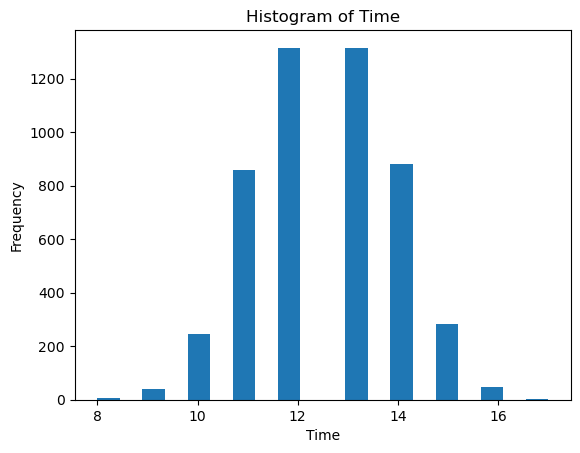

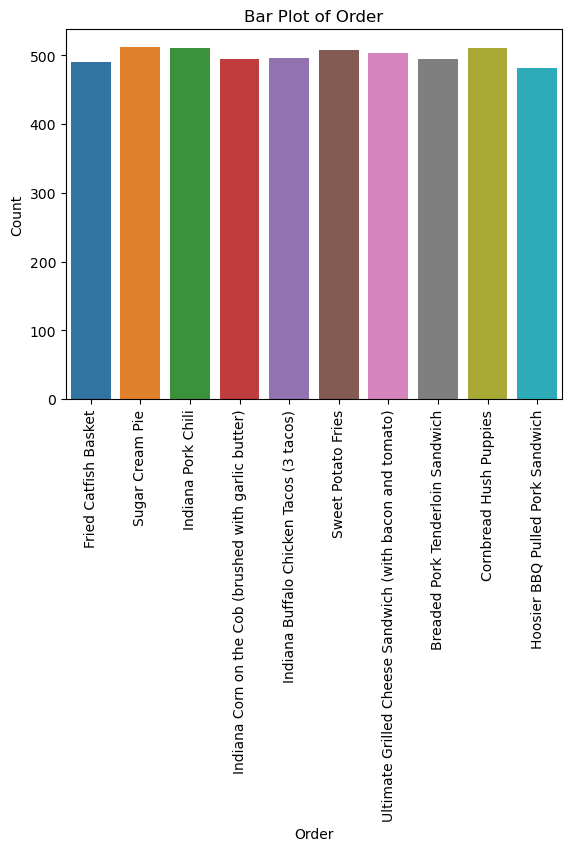

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram for a numeric column
plt.hist(df['Time'], bins=20)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram of Time')
plt.show()

sns.countplot(x='Order', data=df)
plt.xlabel('Order')
plt.ylabel('Count')
plt.title('Bar Plot of Order')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if needed
plt.show()




C:\Users\KIRAN\AppData\Local\Temp\ipykernel_15012\1256883451.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


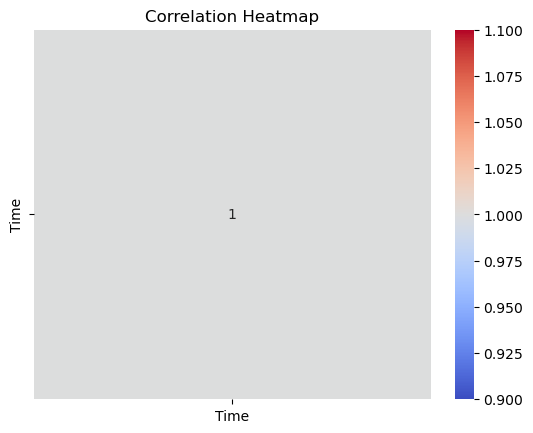

In [6]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def prepare_data(file_path):
    # Load the dataset
    df = pd.read_csv("XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")

    # Encode categorical variables
    label_encoder = LabelEncoder()
    df['Year'] = label_encoder.fit_transform(df['Year'])
    df['Major'] = label_encoder.fit_transform(df['Major'])
    df['University'] = label_encoder.fit_transform(df['University'])

    # Split the data into features (X) and the target (y)
    X = df.drop(columns=['Order'])
    y = df['Order']

    # Split the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


In [18]:
from sklearn.tree import DecisionTreeClassifier

def train_model(X_train, y_train):
    # Initialize the model
    model = DecisionTreeClassifier()

    # Train the model
    model.fit(X_train, y_train)

    return model


In [19]:
from sklearn.metrics import accuracy_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [20]:
import pickle

def pickle_model(model, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(model, f)


In [21]:
if __name__ == '__main__':
    data_file = 'XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv'
    X_train, X_test, y_train, y_test = prepare_data(data_file)
    model = train_model(X_train, y_train)
    accuracy = evaluate_model(model, X_test, y_test)
    print(f"Model Accuracy: {accuracy}")

    # Save the model to a pickle file
    pickle_model(model, 'order_prediction_model.pkl')


Model Accuracy: 0.644
